In [78]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [80]:
 def read_file(filename):
        img = cv2.imread(filename)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        return img

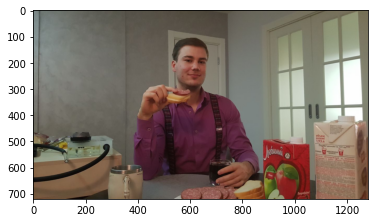

In [81]:
#!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.jpg
filename = "./dup.jpg"
img = read_file(filename)
org_image=np.copy(img)

In [82]:
#from google.colab import drive
#drive.mount('/content/drive')

##img = read_file(filename)

#org_image=np.copy(img)

In [83]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY,
                                  line_size, blur_value)
    return edges

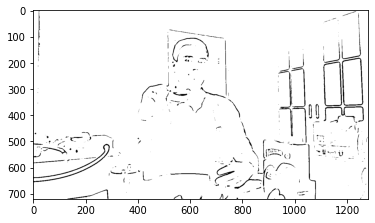

In [84]:
line_size,blur_value = 9,9

edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap="gray")
plt.show()

In [85]:
def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1,3))
    
    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    ##Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result=center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

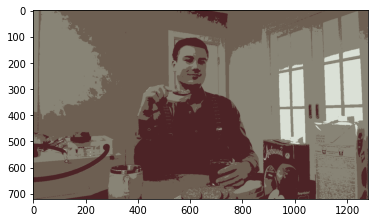

In [86]:
img_quantiz = color_quantization(img, k=4)

plt.imshow(img_quantiz)
plt.show()

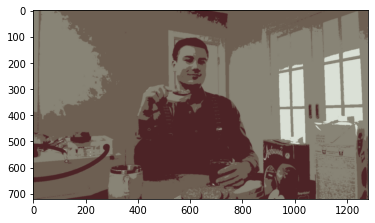

In [87]:
blurred = cv2.bilateralFilter(img_quantiz, d=4, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

In [88]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred,mask= edges)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(c)
    plt.title("Cartoon Image")
    plt.show()
    
    plt.figure(figsize=(5, 5))
    plt.imshow(org_image)
    plt.title("Original Image")
    plt.show()

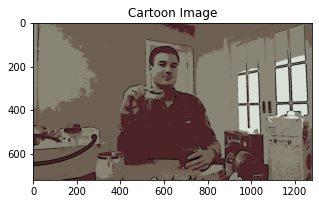

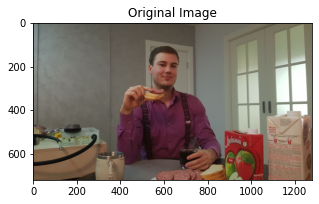

In [89]:
cartoon()